In [100]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import math
import statsmodels.api as sm

In [2]:
df = pd.read_csv(r"C:\Users\thema\OneDrive\Projects\__CTP4900__\Data\world_Bank.csv")

In [3]:
df.head(10)

,Series Name,Series Code,Country Name,Country Code,1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],...,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,19262847,19542982,19688632,21000256,22645130,23553551,...,28189672,29249157,30466479,31541209,32716210,33753499,34636207,35643418,36686784,37769499
1,"Population, total",SP.POP.TOTL,Albania,ALB,3108778,3089027,3060173,3051010,3039616,3026939,...,2913021,2905195,2900401,2895092,2889104,2880703,2876101,2873457,2866376,2854191
2,"Population, total",SP.POP.TOTL,Algeria,DZA,30346083,30774621,31200985,31624696,32055883,32510186,...,35856344,36543541,37260563,38000626,38760168,39543154,40339329,41136546,41927007,42705368
3,"Population, total",SP.POP.TOTL,American Samoa,ASM,57594,58230,58324,58177,57941,57626,...,54849,54310,53691,52995,52217,51368,50448,49463,48424,47321
4,"Population, total",SP.POP.TOTL,Andorra,AND,65655,66097,67820,70849,73907,76933,...,71519,70567,71013,71367,71621,71746,72540,73837,75013,76343
5,"Population, total",SP.POP.TOTL,Angola,AGO,15870753,16394062,16941587,17516139,18124342,18771125,...,23364185,24259111,25188292,26147002,27128337,28127721,29154746,30208628,31273533,32353588
6,"Population, total",SP.POP.TOTL,Antigua and Barbuda,ATG,73821,75055,76215,77195,78075,78941,...,85695,86729,87674,88497,89236,89941,90564,91119,91626,92117
7,"Population, total",SP.POP.TOTL,Argentina,ARG,36653031,37070774,37480493,37885028,38278164,38668796,...,40788453,41261490,41733271,42202935,42669500,43131966,43590368,44044811,44494502,44938712
8,"Population, total",SP.POP.TOTL,Armenia,ARM,3206030,3168523,3133133,3105037,3084102,3065745,...,2946293,2928976,2914421,2901385,2889930,2878595,2865835,2851923,2836557,2820602
9,"Population, total",SP.POP.TOTL,Aruba,ABW,86867,89101,90691,91781,92701,93540,...,100341,101288,102112,102880,103594,104257,104874,105439,105962,106442


## Modify the dataframe to have economic features as columns and countries//years as rows

In [4]:
df_melt = pd.melt(df, id_vars=['Series Name', 'Series Code', 'Country Name', 'Country Code'], 
                  var_name='Year', value_name='Value')

In [5]:
df_melt.head()

,Series Name,Series Code,Country Name,Country Code,Year,Value
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,1999 [YR1999],19262847
1,"Population, total",SP.POP.TOTL,Albania,ALB,1999 [YR1999],3108778
2,"Population, total",SP.POP.TOTL,Algeria,DZA,1999 [YR1999],30346083
3,"Population, total",SP.POP.TOTL,American Samoa,ASM,1999 [YR1999],57594
4,"Population, total",SP.POP.TOTL,Andorra,AND,1999 [YR1999],65655


In [6]:
df_melt['Year'] = df_melt['Year'].str.extract('(\d{4})')[0]

In [7]:
df_restructured = df_melt.pivot_table(index=['Country Name', 'Country Code', 'Year'], 
                                      columns='Series Name', 
                                      values='Value', 
                                      aggfunc='first').reset_index()

In [8]:
df_restructured.head()

Series Name,Country Name,Country Code,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Agriculture, forestry, and fishing, value added (% of GDP)",Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contraceptive prevalence, any method (% of married women ages 15-49)",Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),...,"Prevalence of HIV, total (% of population ages 15-49)","Prevalence of underweight, weight for age (% of children under 5)","Primary completion rate, total (% of relevant age group)","Revenue, excluding grants (% of GDP)","School enrollment, primary and secondary (gross), gender parity index (GPI)","School enrollment, secondary (% gross)",Start-up procedures to register a business (number),Surface area (sq. km),Total debt service (% of GNI),"Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)"
0,Afghanistan,AFG,1999,154.416,..,..,0.0582468417051747,..,..,..,...,0.1,..,..,..,..,..,..,652860,..,..
1,Afghanistan,AFG,2000,152.572,..,12.4,0.0551666066110075,5.3,..,..,...,0.1,..,..,..,..,..,..,652860,..,..
2,Afghanistan,AFG,2001,150.863,..,..,0.0552927191691124,..,..,..,...,0.1,..,..,..,0,12.3246202468872,..,652860,..,..
3,Afghanistan,AFG,2002,148.141,38.6278918638443,..,0.0668101379335566,..,..,..,...,0.1,..,..,..,..,..,..,652860,..,0.372506682976489
4,Afghanistan,AFG,2003,143.37,37.4188554431481,14.3,0.0730049683971786,10.3,..,..,...,0.1,..,..,..,0.544260025024414,12.5488901138306,..,652860,..,0.405407508087606


In [10]:
# replace column names to have '_' over ' '
df_restructured.columns.name = None  # Remove the name for columns
df_restructured.rename(columns=lambda x: x.replace(', ', '_').replace(' ', '_').lower(), inplace=True)

## Visualize missing data within the dataframe

In [11]:
df_restructured.head()

,country_name,country_code,year,"adolescent_fertility_rate_(births_per_1,000_women_ages_15-19)",agriculture_forestry_and_fishing_value_added_(%_of_gdp),births_attended_by_skilled_health_staff_(%_of_total),co2_emissions_(metric_tons_per_capita),contraceptive_prevalence_any_method_(%_of_married_women_ages_15-49),electric_power_consumption_(kwh_per_capita),energy_use_(kg_of_oil_equivalent_per_capita),...,prevalence_of_hiv_total_(%_of_population_ages_15-49),prevalence_of_underweight_weight_for_age_(%_of_children_under_5),primary_completion_rate_total_(%_of_relevant_age_group),revenue_excluding_grants_(%_of_gdp),school_enrollment_primary_and_secondary_(gross)_gender_parity_index_(gpi),school_enrollment_secondary_(%_gross),start-up_procedures_to_register_a_business_(number),surface_area_(sq._km),total_debt_service_(%_of_gni),water_productivity_total_(constant_2015_us$_gdp_per_cubic_meter_of_total_freshwater_withdrawal)
0,Afghanistan,AFG,1999,154.416,..,..,0.0582468417051747,..,..,..,...,0.1,..,..,..,..,..,..,652860,..,..
1,Afghanistan,AFG,2000,152.572,..,12.4,0.0551666066110075,5.3,..,..,...,0.1,..,..,..,..,..,..,652860,..,..
2,Afghanistan,AFG,2001,150.863,..,..,0.0552927191691124,..,..,..,...,0.1,..,..,..,0,12.3246202468872,..,652860,..,..
3,Afghanistan,AFG,2002,148.141,38.6278918638443,..,0.0668101379335566,..,..,..,...,0.1,..,..,..,..,..,..,652860,..,0.372506682976489
4,Afghanistan,AFG,2003,143.37,37.4188554431481,14.3,0.0730049683971786,10.3,..,..,...,0.1,..,..,..,0.544260025024414,12.5488901138306,..,652860,..,0.405407508087606


In [12]:
df_restructured.isnull().sum()

country_name                                                                                       0
country_code                                                                                       0
year                                                                                               0
adolescent_fertility_rate_(births_per_1,000_women_ages_15-19)                                      0
agriculture_forestry_and_fishing_value_added_(%_of_gdp)                                            0
births_attended_by_skilled_health_staff_(%_of_total)                                               0
co2_emissions_(metric_tons_per_capita)                                                             0
contraceptive_prevalence_any_method_(%_of_married_women_ages_15-49)                                0
electric_power_consumption_(kwh_per_capita)                                                        0
energy_use_(kg_of_oil_equivalent_per_capita)                                               

In [13]:
df_restructured.shape

(4557, 54)

In [14]:
rows_with_dots = (df == '..').any(axis=1).sum()

print(f'rows with dots:{rows_with_dots}  rows without dots : {df_restructured.shape[0] - rows_with_dots}')

rows with dots:4492  rows without dots : 65


In [15]:
(df_restructured == '..').sum(axis = 1)

0       36
1       33
2       33
3       29
4       23
        ..
4552     7
4553    10
4554     8
4555    10
4556     8
Length: 4557, dtype: int64

In [16]:
for i in list(df_restructured.columns):
    print(i)

country_name
country_code
year
adolescent_fertility_rate_(births_per_1,000_women_ages_15-19)
agriculture_forestry_and_fishing_value_added_(%_of_gdp)
births_attended_by_skilled_health_staff_(%_of_total)
co2_emissions_(metric_tons_per_capita)
contraceptive_prevalence_any_method_(%_of_married_women_ages_15-49)
electric_power_consumption_(kwh_per_capita)
energy_use_(kg_of_oil_equivalent_per_capita)
exports_of_goods_and_services_(%_of_gdp)
external_debt_stocks_total_(dod_current_us$)
fertility_rate_total_(births_per_woman)
foreign_direct_investment_net_(bop_current_us$)
foreign_direct_investment_net_inflows_(bop_current_us$)
forest_area_(sq._km)
gdp_(current_us$)
gdp_growth_(annual_%)
gdp_per_capita_(current_us$)
gni_per_capita_atlas_method_(current_us$)
gni_per_capita_ppp_(current_international_$)
gni_atlas_method_(current_us$)
gni_ppp_(current_international_$)
gross_capital_formation_(%_of_gdp)
high-technology_exports_(%_of_manufactured_exports)
immunization_measles_(%_of_children_ages_12

In [17]:
# Function to abbreviate common terms in the series names
def abbreviate_name(name):
    abbreviations = {
        'Gross National Income': 'GNI',
        'United States Dollar': 'USD',
        'Percentage': '%',
        'Number': 'No.',
        'Total': 'Tot.',
        'Current': 'Curr.',
        'International': 'Intl.',
        'Agriculture, forestry, and fishing': 'Agri, For, Fish'
    }
    for key, value in abbreviations.items():
        name = name.replace(key, value)
    return name

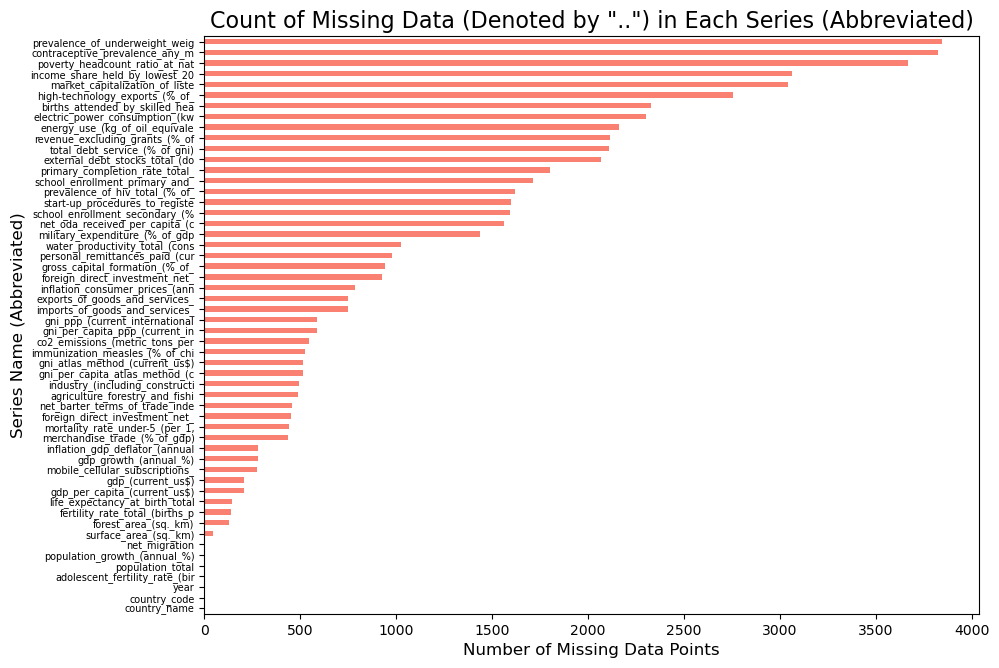

In [22]:
# Applying the abbreviation function and then truncating names to a maximum length
missing_data_counts = (df_restructured == '..').sum()
max_length = 30
shortened_names = missing_data_counts.index.map(lambda x: abbreviate_name(x)[:max_length])

# Creating a new bar graph with the shortened names
plt.figure(figsize=(10, 7.5))
pd.Series(missing_data_counts.values, index=shortened_names).sort_values(ascending=True).plot(kind='barh', color='salmon')

plt.title('Count of Missing Data (Denoted by "..") in Each Series (Abbreviated)', fontsize=16)
plt.xlabel('Number of Missing Data Points', fontsize=12)
plt.ylabel('Series Name (Abbreviated)', fontsize=12)
plt.yticks(fontsize=7)
plt.show()

## First modeling iteration as a subset of the year 2019

In [82]:
df = df.replace('..', np.nan)

In [83]:
df_2019 = df[df['year'] == 2019]

In [84]:
(df_2019.isnull().sum()).sort_values()

country_name                                                                                         0
net_migration                                                                                        0
population_total                                                                                     0
population_growth_(annual_%)                                                                         0
year                                                                                                 0
country_code                                                                                         0
adolescent_fertility_rate_(births_per_1,000_women_ages_15-19)                                        0
surface_area_(sq._km)                                                                                1
forest_area_(sq._km)                                                                                 3
fertility_rate_total_(births_per_woman)                                  

In [85]:
df_2019.shape

(217, 54)

In [86]:
(df_2019.isnull().sum(axis = 1)).value_counts()

9     23
11    23
7     23
10    23
8     19
13    15
6     12
5      7
12     6
14     5
16     5
18     4
4      4
15     4
22     4
36     3
29     3
17     3
30     3
21     3
33     3
37     3
23     2
2      2
20     2
35     2
38     2
31     2
3      2
27     2
26     1
42     1
32     1
Name: count, dtype: int64

In [87]:
df_2019_filtered = df_2019.drop(columns = [col for col in df_2019.columns if (df_2019[col].isnull().sum() > 20)])

In [88]:
df_2019_filtered.columns

Index(['country_name', 'country_code', 'year',
       'adolescent_fertility_rate_(births_per_1,000_women_ages_15-19)',
       'agriculture_forestry_and_fishing_value_added_(%_of_gdp)',
       'fertility_rate_total_(births_per_woman)',
       'foreign_direct_investment_net_inflows_(bop_current_us$)',
       'forest_area_(sq._km)', 'gdp_(current_us$)', 'gdp_growth_(annual_%)',
       'gdp_per_capita_(current_us$)',
       'gni_per_capita_atlas_method_(current_us$)',
       'gni_atlas_method_(current_us$)',
       'industry_(including_construction)_value_added_(%_of_gdp)',
       'inflation_gdp_deflator_(annual_%)',
       'life_expectancy_at_birth_total_(years)',
       'merchandise_trade_(%_of_gdp)',
       'mobile_cellular_subscriptions_(per_100_people)',
       'net_barter_terms_of_trade_index_(2015_=_100)', 'net_migration',
       'population_growth_(annual_%)', 'population_total',
       'surface_area_(sq._km)'],
      dtype='object')

In [89]:
(df_2019_filtered.isnull().sum(axis = 1)).value_counts()

0     175
1      10
3       7
2       6
8       5
9       4
6       2
4       2
5       2
7       2
10      1
11      1
Name: count, dtype: int64

In [36]:
# df_v1 will act as the first dataset for modelling
df_v1 = df_2019_filtered.dropna()

In [37]:
df_v1.shape

(175, 23)

In [39]:
df_v1.head()

,country_name,country_code,year,"adolescent_fertility_rate_(births_per_1,000_women_ages_15-19)",agriculture_forestry_and_fishing_value_added_(%_of_gdp),fertility_rate_total_(births_per_woman),foreign_direct_investment_net_inflows_(bop_current_us$),forest_area_(sq._km),gdp_(current_us$),gdp_growth_(annual_%),...,industry_(including_construction)_value_added_(%_of_gdp),inflation_gdp_deflator_(annual_%),life_expectancy_at_birth_total_(years),merchandise_trade_(%_of_gdp),mobile_cellular_subscriptions_(per_100_people),net_barter_terms_of_trade_index_(2015_=_100),net_migration,population_growth_(annual_%),population_total,surface_area_(sq._km)
20,Afghanistan,AFG,2019,86.803,25.773971,4.870,2.340455e+07,12084.4,1.890450e+10,3.911603,...,14.058112,6.521480,63.565,40.418943,59.783879,111.903426,-8082,2.908529,37769499,652860.0
41,Albania,ALB,2019,15.013,18.389332,1.414,1.201022e+09,7889.0,1.540183e+10,2.087712,...,20.619655,1.257025,79.282,55.921940,91.516429,103.974507,-8889,-0.426007,2854191,28750.0
62,Algeria,DZA,2019,12.303,12.336727,2.988,1.381200e+09,19390.0,1.717603e+11,1.000000,...,36.843889,-0.472182,76.474,46.543936,106.369609,101.691273,-36386,1.839445,42705368,2381741.0
125,Angola,AGO,2019,141.278,7.882625,5.442,-4.098479e+09,671624.4,6.930911e+10,-0.702273,...,49.760921,19.187004,62.448,70.485683,45.837741,126.324143,58986,3.395278,32353588,1246700.0
146,Antigua and Barbuda,ATG,2019,30.830,1.745958,1.468,1.282510e+08,81.8,1.675404e+09,4.344060,...,21.233357,0.055011,78.691,44.108772,199.748144,90.679474,0,0.534443,92117,440.0


In [40]:
# check for duplicates
df_v1.duplicated().unique()

array([False])

In [41]:
df_v1.dtypes

country_name                                                      object
country_code                                                      object
year                                                               int64
adolescent_fertility_rate_(births_per_1,000_women_ages_15-19)    float64
agriculture_forestry_and_fishing_value_added_(%_of_gdp)          float64
fertility_rate_total_(births_per_woman)                          float64
foreign_direct_investment_net_inflows_(bop_current_us$)          float64
forest_area_(sq._km)                                             float64
gdp_(current_us$)                                                float64
gdp_growth_(annual_%)                                            float64
gdp_per_capita_(current_us$)                                     float64
gni_per_capita_atlas_method_(current_us$)                        float64
gni_atlas_method_(current_us$)                                   float64
industry_(including_construction)_value_added_(%_of

In [42]:
df_v1.drop(columns = ['country_name', 'country_code'], inplace = True)

C:\Users\thema\AppData\Local\Temp\ipykernel_25640\2703362129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_v1.drop(columns = ['country_name', 'country_code'], inplace = True)


In [43]:
df_v1.head()

,year,"adolescent_fertility_rate_(births_per_1,000_women_ages_15-19)",agriculture_forestry_and_fishing_value_added_(%_of_gdp),fertility_rate_total_(births_per_woman),foreign_direct_investment_net_inflows_(bop_current_us$),forest_area_(sq._km),gdp_(current_us$),gdp_growth_(annual_%),gdp_per_capita_(current_us$),gni_per_capita_atlas_method_(current_us$),...,industry_(including_construction)_value_added_(%_of_gdp),inflation_gdp_deflator_(annual_%),life_expectancy_at_birth_total_(years),merchandise_trade_(%_of_gdp),mobile_cellular_subscriptions_(per_100_people),net_barter_terms_of_trade_index_(2015_=_100),net_migration,population_growth_(annual_%),population_total,surface_area_(sq._km)
20,2019,86.803,25.773971,4.870,2.340455e+07,12084.4,1.890450e+10,3.911603,500.522981,530.0,...,14.058112,6.521480,63.565,40.418943,59.783879,111.903426,-8082,2.908529,37769499,652860.0
41,2019,15.013,18.389332,1.414,1.201022e+09,7889.0,1.540183e+10,2.087712,5396.214227,5230.0,...,20.619655,1.257025,79.282,55.921940,91.516429,103.974507,-8889,-0.426007,2854191,28750.0
62,2019,12.303,12.336727,2.988,1.381200e+09,19390.0,1.717603e+11,1.000000,4021.983608,4050.0,...,36.843889,-0.472182,76.474,46.543936,106.369609,101.691273,-36386,1.839445,42705368,2381741.0
125,2019,141.278,7.882625,5.442,-4.098479e+09,671624.4,6.930911e+10,-0.702273,2142.238757,2040.0,...,49.760921,19.187004,62.448,70.485683,45.837741,126.324143,58986,3.395278,32353588,1246700.0
146,2019,30.830,1.745958,1.468,1.282510e+08,81.8,1.675404e+09,4.344060,18187.779712,17480.0,...,21.233357,0.055011,78.691,44.108772,199.748144,90.679474,0,0.534443,92117,440.0


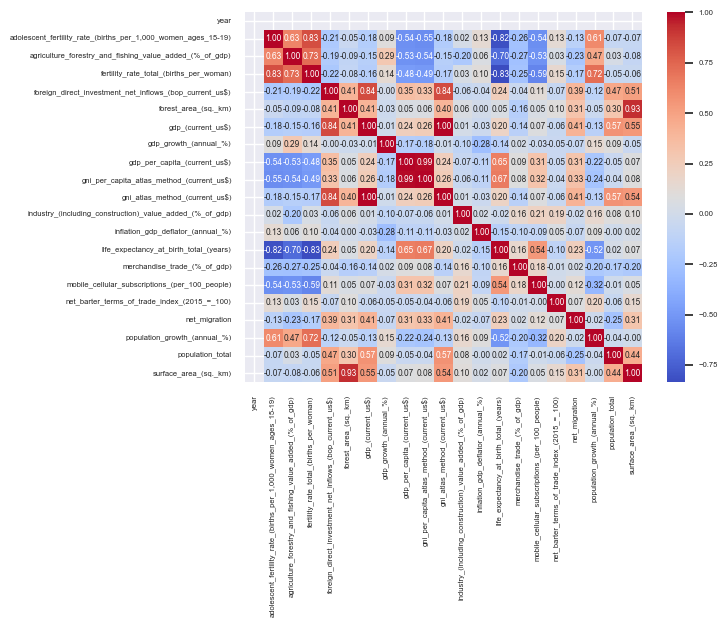

In [45]:
# Compute the correlation matrix
corr_matrix = df_v1.corr()

# Create a heatmap
sns.set(font_scale=0.5)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',  fmt=".2f")
plt.show()

### Modelling phase

In [46]:
#linear regression implemntation
model = LinearRegression()

In [47]:
X = df_v1.drop('gdp_(current_us$)', axis = 1)
y = df_v1['gdp_(current_us$)']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1234)

In [49]:
model.fit(X_train, y_train)

LinearRegression()

In [50]:
y_pred = model.predict(X_test)

In [70]:
mse = mean_squared_error(y_pred, y_test)
mse

8.892834634555028e+20

In [56]:
df_v1.std()

year                                                             0.000000e+00
adolescent_fertility_rate_(births_per_1,000_women_ages_15-19)    4.024944e+01
agriculture_forestry_and_fishing_value_added_(%_of_gdp)          9.942762e+00
fertility_rate_total_(births_per_woman)                          1.303333e+00
foreign_direct_investment_net_inflows_(bop_current_us$)          3.396182e+10
forest_area_(sq._km)                                             8.215815e+05
gdp_(current_us$)                                                2.026024e+12
gdp_growth_(annual_%)                                            3.010752e+00
gdp_per_capita_(current_us$)                                     2.045425e+04
gni_per_capita_atlas_method_(current_us$)                        1.968593e+04
gni_atlas_method_(current_us$)                                   2.061803e+12
industry_(including_construction)_value_added_(%_of_gdp)         1.068860e+01
inflation_gdp_deflator_(annual_%)                               

In [57]:
def within_n_std(df, n_std):
    # Initialize an empty list to store results
    within_n_std_list = []
    column_names = []
    
    # Loop through each column to calculate the percentages
    for column in df.columns:
        mean_value = df[column].mean()
        std_value = df[column].std()
        
        within_n_std = ((df[column] > mean_value - n_std * std_value) & (df[column] < mean_value + n_std * std_value)).mean() * 100
        within_n_std_list.append(within_n_std)
        column_names.append(column)
        
    # Create a new DataFrame to hold the results
    result_df = pd.DataFrame({f'Within_{n_std}_STD': within_n_std_list}, index=column_names)
    
    return result_df

In [58]:
within_n_std(df_v1, 3)

,Within_3_STD
year,0.000000
"adolescent_fertility_rate_(births_per_1,000_women_ages_15-19)",98.857143
agriculture_forestry_and_fishing_value_added_(%_of_gdp),99.428571
fertility_rate_total_(births_per_woman),99.428571
foreign_direct_investment_net_inflows_(bop_current_us$),98.285714
forest_area_(sq._km),97.714286
gdp_(current_us$),98.857143
gdp_growth_(annual_%),98.285714
gdp_per_capita_(current_us$),97.714286
gni_per_capita_atlas_method_(current_us$),98.285714


In [59]:
scaler = StandardScaler()

In [60]:
scaled_array = scaler.fit_transform(df_v1)

In [91]:
scaled_df_v1 = pd.DataFrame(scaled_array, columns=df_v1.columns)

In [92]:
X = scaled_df_v1.drop(columns = 'gdp_(current_us$)')
y = scaled_df_v1['gdp_(current_us$)']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1234)

In [94]:
model.fit(X_train, y_train)

LinearRegression()

In [95]:
y_pred = model.predict(X_test)

In [96]:
mse = mean_squared_error(y_pred, y_test)

In [97]:
y_pred.mean()

-0.045847524758661475

In [98]:
math.sqrt(mse)

0.014761142213698014

In [99]:
math.sqrt(mse)/y_pred.mean()

-0.321961595340201

In [101]:
X = sm.add_constant(X)

In [109]:
lin_reg = sm.OLS(y,X).fit()

In [111]:
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:      gdp_(current_us$)   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.921e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          1.54e-302
Time:                        12:09:22   Log-Likelihood:                 565.42
No. Observations:                 175   AIC:                            -1091.
Df Residuals:                     155   BIC:                            -1028.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------